Name: Zhang Jiaqi

Student No: 24120514g

# Obtain Data

## Get data by requests

In this assignment, I want to visualize data from HKTide (https://www.hko.gov.hk/en/tide/ttext.htm). I chose data from Kwai Chung in 2024. First, I used lib "requests" to send HTTP request to the server of HKTide and get response.

In [1]:
import requests

response = requests.get("https://www.hko.gov.hk/tide/KCTtextPH2024_uc.htm")

# check response status
if(response.ok):
    print("Data is ready!")
else:
    print(response.status_code)

Data is ready!


## Analyze data by BeautifulSoup

Then, I used lib "bs4" to analyze the webpage and get what I want. I found that all the height data are stored in "td", and with a blank space in the beginning. 

I have all the tide height data in 2024, but I only want data in January. So I only kept those useful data. I also transform data into a 2d numpy array, so I can use them more easily later.

In [2]:
from bs4 import BeautifulSoup as bs
import numpy as np

content = response.text
soup = bs(content, "html.parser")

# find required data and store them in a list
tideData = []
tides = soup.findAll("td")
for tide in tides:
    tideValue = tide.string
    if tideValue != None and tideValue[0]==" ":
        tideData.append(float(tideValue.strip()))

# delete useless data and convert list into a 2d array
tideData = tideData[:31*24]
tideArr = np.array(tideData).reshape(31,24)

# test: tide data of 2024 Jan 1st
tideArr[0]

array([2.16, 2.  , 1.72, 1.37, 1.04, 0.77, 0.65, 0.67, 0.83, 1.04, 1.22,
       1.36, 1.44, 1.49, 1.48, 1.44, 1.42, 1.43, 1.53, 1.71, 1.91, 2.07,
       2.14, 2.14])

# Visualization

## Use Matplotlib to visualize data

After getting all the data I need, I used lib "matplotlib" to draw plots to visualize them.

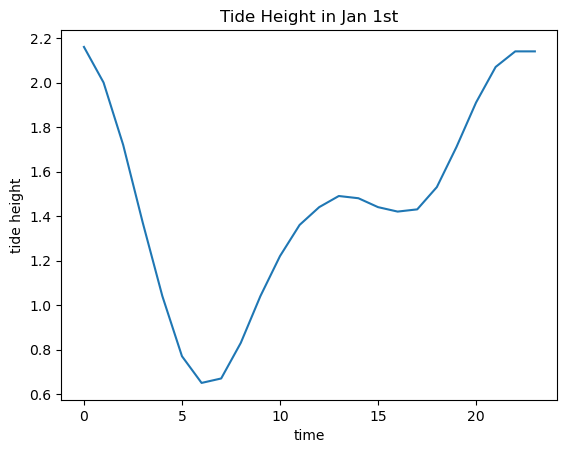

In [3]:
import matplotlib.pyplot as plt

# x -> 24hrs, y -> tide height
x = np.arange(24)
y = tideArr[0]

# show the tide height of Jan 1st
fig, ax = plt.subplots()
ax.plot(x, y)

ax.set_title("Tide Height in Jan 1st")
ax.set_xlabel("time")
ax.set_ylabel("tide height")
plt.show()

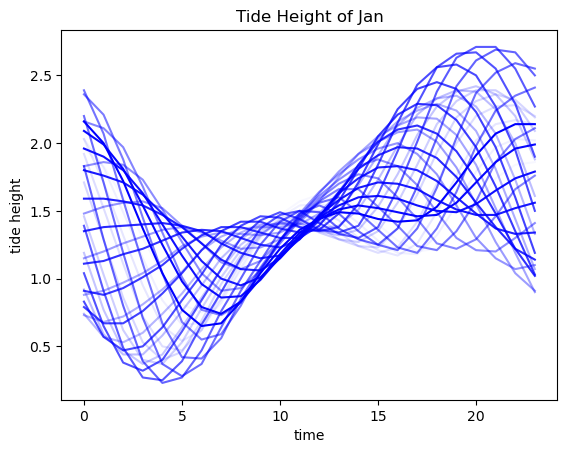

In [4]:
# show tide height of whole Janurary
x = np.arange(24)

fig, ax = plt.subplots()
for i in range(31):
    # make plots gradually become transparent by setting alpha
    ax.plot(x, tideArr[i], color="blue", alpha=(31-i)/31)

ax.set_title("Tide Height of Jan")
ax.set_xlabel("time")
ax.set_ylabel("tide height")
plt.show()

## Make lines smoother using scipy.interpolate

I found that the line is not so smooth because it only has 24 records per day. So I used lib "scipy" to smooth it.

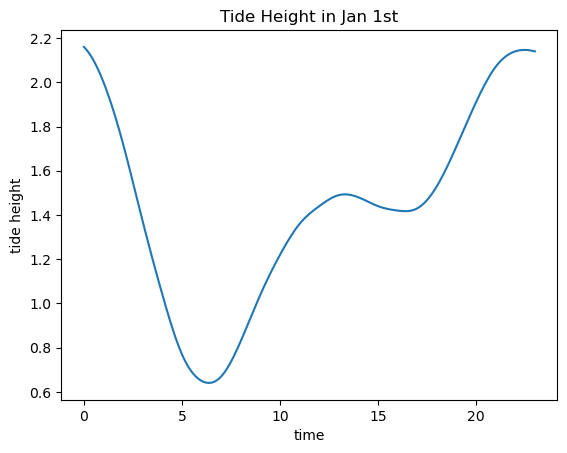

In [5]:
from scipy.interpolate import make_interp_spline, BSpline

# show the tide height of Jan 1st
x = np.arange(24)
y = tideArr[0]

# 200 represents number of points to make between
xnew = np.linspace(x.min(), x.max(), 200) 

spl = make_interp_spline(x, y, k=3)
ynew = spl(xnew)

fig, ax = plt.subplots()
ax.plot(xnew, ynew)

ax.set_title("Tide Height in Jan 1st")
ax.set_xlabel("time")
ax.set_ylabel("tide height")
plt.show()

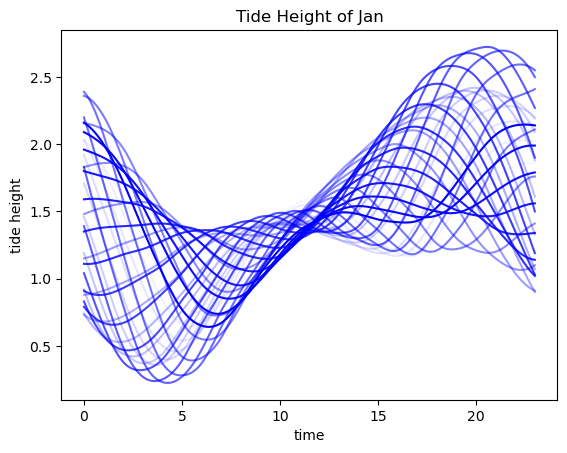

In [6]:
# show smoother tide height of whole Janurary
x = np.arange(24)
xnew = np.linspace(x.min(), x.max(), 200)

fig, ax = plt.subplots()
for i in range(31):
    spl = make_interp_spline(x, tideArr[i], k=3)
    ynew = spl(xnew)
    ax.plot(xnew, ynew, color="blue", alpha=(31-i)/31)

ax.set_title("Tide Height of Jan")
ax.set_xlabel("time")
ax.set_ylabel("tide height")
plt.show()

# Export Graph

At last, I export vector graphics of this drawing. Now it can be easily redesigned.

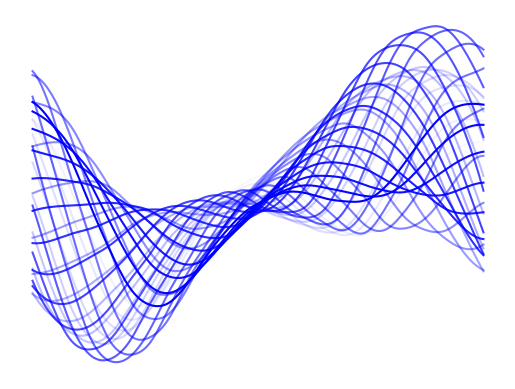

In [7]:
# export drawing
x = np.arange(24)
xnew = np.linspace(x.min(), x.max(), 200)

fig, ax = plt.subplots()
for i in range(31):
    spl = make_interp_spline(x, tideArr[i], k=3)
    ynew = spl(xnew)
    ax.plot(xnew, ynew, color="blue", alpha=(31-i)/31)

plt.axis('off')
plt.savefig('output.pdf')